In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

print("Метки класса:", np.unique(y))


Метки класса: [0 1 2]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1,
    stratify=y,
)

print("Кол-во меток в классе:", np.bincount(y))
print("Кол-во меток в классе:", np.bincount(y_test))
print("Кол-во меток в классе:", np.bincount(y_train))

Кол-во меток в классе: [50 50 50]
Кол-во меток в классе: [15 15 15]
Кол-во меток в классе: [35 35 35]


In [4]:
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)

# Use Python
print("Classification error: %d" % (y_test - y_pred).sum())
classification_error = (y_test - y_pred).sum() / len(y_test)
print(
    "Classification error (percent): %.3f" % (classification_error * 100) + "%"
)

print("Accuracy (python): %.3f" % (1 - classification_error))
print()

# Use skl
print("Accuracy (skl): %.3f" % accuracy_score(y_test, y_pred))
print("Accuracy (skl, class method): %.3f" % ppn.score(X_test_std, y_test))

Classification error: 1
Classification error (percent): 2.222%
Accuracy (python): 0.978

Accuracy (skl): 0.978
Accuracy (skl, class method): 0.978


In [6]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ("o", "s", "^", "v", "<")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")

    cmap = ListedColormap(colors[: len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[cl],
            marker=markers[cl],
            label=f"Class {cl}",
            edgecolor="black",
        )

    if test_idx:
        X_test, _ = X[test_idx, :], y[test_idx]

        plt.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c="none",
            edgecolor="black",
            alpha=1.0,
            linewidth=1,
            marker="o",
            s=100,
            label="Test set",
        )


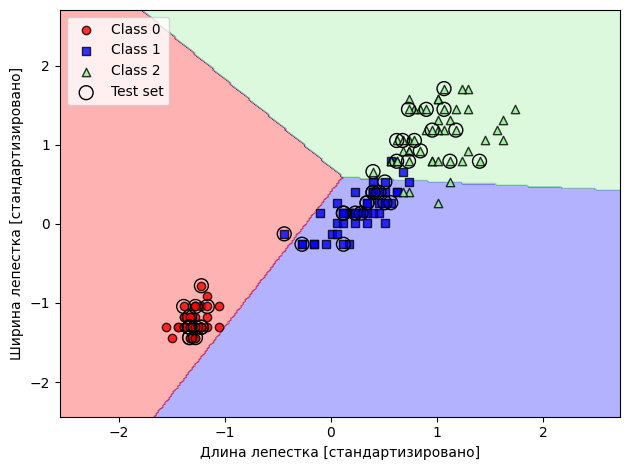

In [7]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(
    X_combined_std,
    y_combined,
    ppn,
    range(105, 150),
)

plt.xlabel("Длина лепестка [стандартизировано]")
plt.ylabel("Ширина лепестка [стандартизировано]")

plt.legend(loc="upper left")
plt.tight_layout()
plt.show()